## Analytics on Australia's Dept. of Education employee exit surveys

In this project, we aim to answer questions regarding the nature of employee's resigning from Australia's *Department of Education, Training, and Employment* (DETE). To investigate this issue, we'll be exploring datasets from the DETE as well as data gathered from the *Technical and Further Institute* (TEFA) in Queensland, Australia to **define and answer the following business questions**:
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Below is a **data dictionary** of our DETE:
* `ID`: An id used to identify the participant of the survey
* `SeparationType`: The reason why the person's employment ended
* `Cease Date`: The year or month the person's employment ended
* `DETE Start Date`: The year the person began employment with the DETE

Another is for the TEFA dataset:
* `Record ID`: An id used to identify the participant of the survey
* `Reason for ceasing employment`: The reason why the person's employment ended
* `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)

## Data Collection

In the code below, we'll be uploading both datasets on to our Jupyter Notebook and running some quick observations on both surveys, with a focus on the column variables we mentioned in the data dictionary. We'll then inegrate research conducted by Padilla and SMS Research Advisors into our analysis to better understand the employee engagement levels of both these institutes. The research article we'll draw from can be found [here](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage).

In [1]:
import numpy as np
import pandas as pd

dete_survey = pd.read_csv(r"C:\Users\owner\Documents\Data Science\Datasets\aus-dete-survey.csv", encoding='UTF-8', na_values=['Not Stated', 'N/A'])
print("AUS DETE Survey: ", '\n', dete_survey.columns, '\n', dete_survey.shape, '\n')

resign_reasons_d = dete_survey['SeparationType'].value_counts()
print(resign_reasons_d, '\n')

missing_d = dete_survey['SeparationType'].isnull().sum()
print(missing_d, '\n')

AUS DETE Survey:  
 Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Professional Development',
       'Opportunities for promotion', 'Staff morale', 'Workplace issue',
       'Physical environment', 'Worklife balance',
       'Stress and pressure support', 'Performance of supervisor',
       'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations',
       'Feedback', 'Further PD', 'Communication

**Initial Observations: AUS DETE Employee exit surveys**

After uploading our DETE dataset, we taillied some initial reasons for why employees may have left the company. In our `resign_reasons_d` variable, we identified `Age Retirement` and `Resignation-Other reasons` as the two key contributers to employee turnover and, lucky for us, there were `0` missing variables in this column.

In [2]:
tafe_survey = pd.read_csv(r"C:\Users\owner\Documents\Data Science\Datasets\aus-tafe-survey.csv", encoding='Windows-1252', na_values=['Not Stated', 'N/A', '-', 'NONE'])
print("AUS TAFE Survey: ", '\n', tafe_survey.columns, '\n', tafe_survey.shape)

resign_reasons_t = tafe_survey['Reason for ceasing employment'].value_counts()
print(resign_reasons_t, '\n')

missing_t = tafe_survey['Reason for ceasing employment'].isnull().sum()
print(missing_t, '\n')

AUS TAFE Survey:  
 Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor.     Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I

**Initial observations: TAFE Employee exit surveys**

This dataset, on the otherhand, is much more granular in terms of how they documented information on employee turnover and employee responses. From our `resign_reasons_t` variable, we found that `Resignation` and `Contract Expired` were the lead causes for turnover, perhaps signalling a weaker culture and workplace environment as compared to the DETE organization. There was also a single value in this column that was either missing or incomplete.

## Data Cleaning

Next, we'll be dropping columns in both our datasets that won't be relevant for our analysis. For our `dete_survey` dataset, all the columns before `None of the above` captured information on the various reasons for why employees resigned or retired, while the columns after `gender` captured their demographic information. All other columns in between were not as valuable for our analysis.

On the other hand, our reasons for excluding certain columns in the `tafe_survey` dataset were similar in the sense that we only kept information which contributed to an employee's resignation or retirement, along with demographic information about them. In this section, we'll identify comparable variables between the two datasets and prepare them to cleanly join both datasets.

In [3]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
print(dete_survey_updated.columns, '\n')

tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
print(tafe_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object') 

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fa

**Analytic Checkpoint - Re-formatting Column Names**: With the code below, we standardized the column names in `dete_survey_updated` to make it easier for us when we merge it with the `tafe_survey_updated` dataset. We did this by replacing all spaces between names with an underscore, converting all the characters into lowercase, and changing the names so that the language is easier to interpret for the lay reader. 

In [4]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ', '_').str.strip().str.lower()
dete_survey_updated.rename(columns={'dete_start_date': 'first_yr', 'cease_date': 'last_yr',
                                    'dissatisfaction_with_the_department': 'dissatisfaction_with_dept'}, inplace=True)

#Duplicate the 'study/travel' column and create separate 'study' and 'travel' columns
dete_survey_updated['travel'] = dete_survey_updated['study/travel'].copy()

dete_survey_updated.columns = dete_survey_updated.columns.str.replace('study/travel', 'study')
print(dete_survey_updated.columns)

Index(['id', 'separationtype', 'last_yr', 'first_yr', 'role_start_date',
       'position', 'classification', 'region', 'business_unit',
       'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_dept',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'travel'],
      dtype='object')


Now we'll repeat this process again with the `tafe_survey_updated` data in the code below.

In [5]:
tafe_survey_updated.columns = tafe_survey_updated.columns.str.replace(' ', '_').str.strip().str.lower()

#These ones won't update for some reason?
tafe_survey_updated.rename(columns={'gender._    what_is_your_gender?': 'gender',
                                     'currentage._    current_age': 'age',
                                     'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'}, inplace=True)

tafe_survey_updated.rename(columns={'record_id': 'id','reason_for_ceasing_employment': 'separationtype', 
                                    'cessation_year': 'last_yr', 
                                    'contributing_factors._career_move_-_public_sector_': 'career_move_to_public_sector', 
                                    'contributing_factors._career_move_-_private_sector_': 'career_move_to_private_sector', 
                                    'contributing_factors._ill_health': 'ill_health',
                                    'contributing_factors._maternity/family': 'maternity/family',
                                    'contributing_factors._job_dissatisfaction': 'job_dissatisfaction',
                                   'contributing_factors._interpersonal_conflict': 'interpersonal_conflicts', 
                                    'contributing_factors._study': 'study',
                                    'contributing_factors._travel': 'travel',
                                    'contributing_factors._none': 'none_of_the_above'}, inplace=True)


print(tafe_survey_updated.columns)

Index(['id', 'institute', 'workarea', 'last_yr', 'separationtype',
       'career_move_to_public_sector', 'career_move_to_private_sector',
       'contributing_factors._career_move_-_self-employment', 'ill_health',
       'maternity/family', 'contributing_factors._dissatisfaction',
       'job_dissatisfaction', 'interpersonal_conflicts', 'study', 'travel',
       'contributing_factors._other', 'none_of_the_above',
       'gender._    what_is_your_gender?', 'currentage._    current_age',
       'employment_type._    employment_type',
       'classification._    classification',
       'lengthofserviceoverall._overall_length_of_service_at_institute_(in_years)',
       'lengthofservicecurrent._length_of_service_at_current_workplace_(in_years)'],
      dtype='object')


**Analytic Checkpoint - Filtering data based on variable criteria**: Now that we've filtered the variables we're interested in and renamed them to provide more consistency when we join the two databases, we'll now further our focus on the data points we're most intersted in. Going back to the original goal of our analysis, we will be primarily interested in the commonalities between employees who *resigned*. To achieve this, again, we will filter our analysis down to employees who've been classified in the `separationtype` variable as a `Resignation` and store them in the objects: `dete_resignation` and `tafe_resignation`.

In [6]:
print("Reasons for ceasing employmet (DETE): ")
print(dete_survey_updated['separationtype'].value_counts(), '\n')
dete_resignation = dete_survey_updated[dete_survey_updated['separationtype'].isin(['Resignation-Other reasons',
                                                                                   'Resignation-Other employer',
                                                                                   'Resignation-Move overseas/interstate'])]
print("DETE Employees who resigned: ", dete_resignation.shape, '\n')


print("Reasons for ceasing employmet (TAFE): ")
print(tafe_survey_updated['separationtype'].value_counts(), '\n')
tafe_resignation = tafe_survey_updated.loc[tafe_survey_updated['separationtype'] == 'Resignation'] #This is ok
print("TAFE Employees who resigned: ", tafe_resignation.shape, '\n')

Reasons for ceasing employmet (DETE): 
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64 

DETE Employees who resigned:  (311, 36) 

Reasons for ceasing employmet (TAFE): 
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64 

TAFE Employees who resigned:  (340, 23) 



**Analytic Checkpoint - Calculating employment length:** One of the key goals of our analysis is identifying the trends amongst employees who've resigned and a crucial aspect of this is identifying how long they stayed with the company. Since there isn't a specific variable that tells us this in our `dete_resignation` dataset, we can infer their employment length by subtracting their `last_yr` variable with their `first_yr` in the code below. Then, we can assign the results into our newly created `institute_service` column. 

Based on our results, we've identified that `1963` was the earliest year an employee started with the company and that the longest employee tenure with the institution was `49` years!

In [7]:
#dete_resignation['first_yr'] ok, cleaning dete_resignation['last_yr']
dete_resignation['last_yr'] = dete_resignation.loc[:, 'last_yr'].copy().astype('str').str.split('/').str.get(-1).astype('float')
print(dete_resignation['last_yr'].value_counts().sort_index(ascending=False), '\n')
print(dete_resignation['first_yr'].value_counts().sort_index(ascending=True).head(), '\n')

dete_resignation['institute_service'] = dete_resignation.loc[:, 'last_yr'].copy() - dete_resignation.loc[:, 'first_yr'].copy()

print("Employment length (yrs): ")
print(dete_resignation['institute_service'].value_counts().sort_index().tail(10))

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: last_yr, dtype: int64 

1963.0    1
1971.0    1
1972.0    1
1973.0    1
1974.0    2
Name: first_yr, dtype: int64 

Employment length (yrs): 
32.0    3
33.0    1
34.0    1
35.0    1
36.0    2
38.0    1
39.0    3
41.0    1
42.0    1
49.0    1
Name: institute_service, dtype: int64


C:\Users\owner\Documents\Anaconda Package\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\owner\Documents\Anaconda Package\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


**Analytic Checkpoint - Creating bins:** One of the problems we've ran into when trying to create consistency amongst the two datasets is that on the `tafe_resignation` Dataframe (df), employee's term with the company is displayed in terms of bins, or ranges, rather than specific time lengths such as what's displayed in our `dete_bins` variable. To account for this difference, we went ahead and categorized the employment lengths in DETE in terms of ranges, created a new column titled `'lengthofservicecurrent._length_of_service_at_current_workplace_(in_years)'` to match a similar one found in  `tafe_resignation`, and then compared them with our `tafe_bins` variable. 

In [8]:
tafe_bins = tafe_resignation['lengthofserviceoverall._overall_length_of_service_at_institute_(in_years)'].astype('str').value_counts()

print("TAFE Service to Institute (yrs): ")
print(tafe_bins)

TAFE Service to Institute (yrs): 
Less than 1 year      73
1-2                   64
3-4                   63
nan                   50
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: lengthofserviceoverall._overall_length_of_service_at_institute_(in_years), dtype: int64


In [9]:
#Converting dete_resignation['institute_service'] values into bins
bins = [0, 1, 2, 3, 4, 5, 6, 7, 10, 20, 30, 40, 50]
labels = ['Less than 1 year', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-10', '10-20', '20-30', '30-40', '40-50']
dete_resignation['lengthofservicecurrent._length_of_service_at_current_workplace_(in_years)'] = pd.cut(dete_resignation.loc[:, 'institute_service'], bins=bins, labels=labels)
print(dete_resignation['lengthofservicecurrent._length_of_service_at_current_workplace_(in_years)'].dtype, '\n')

print("DETE Service to Institute (yrs): ")
dete_bins_sorted = dete_resignation['lengthofservicecurrent._length_of_service_at_current_workplace_(in_years)'].value_counts().sort_index()
print(dete_bins_sorted)

category 

DETE Service to Institute (yrs): 
Less than 1 year    22
1-2                 14
2-3                 20
3-4                 16
4-5                 23
5-6                 17
6-7                 13
7-10                28
10-20               57
20-30               27
30-40               13
40-50                3
Name: lengthofservicecurrent._length_of_service_at_current_workplace_(in_years), dtype: int64


C:\Users\owner\Documents\Anaconda Package\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


**Analytic Checkpoint - Isolating Dissatisfied Employees:** Now with the code below, we're going to create a new column titled `dissatisfaction` which stores a Boolean value whenever terms related to job dissatisfaction appear within a row. The Boolean will result in `True` if any of the columns we specified, for example the `'job_dissatisfaction'` columns in our `tafe_resignation` dataframe, have a value or `True` Boolean stored within it's column section. 

In our `dete_resignation` dataframe, we've tested multiple columns for stored or `True` values similar to what we didn in our `tafe_resignation` dataframe.

Lastly, we'll add one more column to both dataframes, titled `institute`, to help us distinguish the values belonging to each dataframe when we later combine them.

In [10]:
print(tafe_resignation['job_dissatisfaction'].iloc[9:15], '\n')
print(tafe_resignation['contributing_factors._dissatisfaction'].iloc[5:10], '\n')

def update_vals(val):
    if val is np.nan:
        return False
    elif val is '-':
        return False
    else:
        return True
    
tafe_resignation['dissatisfaction'] = tafe_resignation[['job_dissatisfaction',
                                                        'contributing_factors._dissatisfaction']].applymap(update_vals).any(axis=1, skipna=False).copy()
tafe_resignation_up = tafe_resignation.copy()
print(tafe_resignation_up.columns)

14    Job Dissatisfaction
15                    NaN
16                    NaN
17    Job Dissatisfaction
18                    NaN
19                    NaN
Name: job_dissatisfaction, dtype: object 

8                                        NaN
9                                        NaN
10                                       NaN
13                                       NaN
14    Contributing Factors. Dissatisfaction 
Name: contributing_factors._dissatisfaction, dtype: object 

Index(['id', 'institute', 'workarea', 'last_yr', 'separationtype',
       'career_move_to_public_sector', 'career_move_to_private_sector',
       'contributing_factors._career_move_-_self-employment', 'ill_health',
       'maternity/family', 'contributing_factors._dissatisfaction',
       'job_dissatisfaction', 'interpersonal_conflicts', 'study', 'travel',
       'contributing_factors._other', 'none_of_the_above',
       'gender._    what_is_your_gender?', 'currentage._    current_age',
       'employment_type

C:\Users\owner\Documents\Anaconda Package\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [11]:
dete_resignation['dissatisfaction'] = dete_resignation[['job_dissatisfaction', 'dissatisfaction_with_dept', 
                                         'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security',
                                         'work_location', 'employment_conditions', 'work_life_balance',
                                         'workload']].any(axis=1, skipna=False).copy()

dete_resignation_up = dete_resignation.copy()
print(dete_resignation_up.columns)

Index(['id', 'separationtype', 'last_yr', 'first_yr', 'role_start_date',
       'position', 'classification', 'region', 'business_unit',
       'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_dept',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'travel', 'institute_service',
       'lengthofservicecurrent._length_of_service_at_current_workplace_(in_years)',
       'dissatisfaction'],
      dtype='object')


C:\Users\owner\Documents\Anaconda Package\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [12]:
#Adding an extra column to distinguish between datasets

dete_resignation_up['institute'] = 'DETE'
print(dete_resignation_up[['last_yr', 'institute', 'separationtype', 'dissatisfaction']].head(3), '\n')
print(dete_resignation_up['dissatisfaction'].value_counts(), '\n')

tafe_resignation_up['institute'] = 'TAFE'
print(tafe_resignation_up[['institute','separationtype', 'dissatisfaction']].head(3), '\n')
print(tafe_resignation_up['dissatisfaction'].value_counts())

   last_yr institute             separationtype  dissatisfaction
3   2012.0      DETE  Resignation-Other reasons            False
5   2012.0      DETE  Resignation-Other reasons             True
8   2012.0      DETE  Resignation-Other reasons            False 

False    162
True     149
Name: dissatisfaction, dtype: int64 

  institute separationtype  dissatisfaction
3      TAFE    Resignation            False
4      TAFE    Resignation            False
5      TAFE    Resignation            False 

False    249
True      91
Name: dissatisfaction, dtype: int64


## Basic Data Analysis

**Combining the datasets:**
Now we get to the moment of truth where we finally combine both datasets using the `concat()` function to do a vertical, `outer` join. 

In [13]:
combined = pd.concat([dete_resignation_up, tafe_resignation_up], axis=0, sort=False)
print(combined.shape, '\n')
print(combined.columns, '\n')

(651, 49) 

Index(['id', 'separationtype', 'last_yr', 'first_yr', 'role_start_date',
       'position', 'classification', 'region', 'business_unit',
       'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_dept',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'travel', 'institute_service',
       'lengthofservicecurrent._length_of_service_at_current_workplace_(in_years)',
       'dissatisfaction', 'institute', 'workarea',
       'contributing_factors._career_move_-_self-employment',
       'contributing_factors._dissatisfaction', 'contributing

**Analytic Checkpoint - Integrating research findings in our analysis:** Research findings by SMS Research advisors found that employee engagement is highly correlated with employment length with a company which can be further understood by dividing the lengths into 4 main categories, as summarized by [Business Wire](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage): 

* **Newbie** (3 years or less at the company): These employees are least invested in company culture and the most transient, viewing the risk of switching jobs to be low. The top motivator for 59 percent of those in the newbie career stage is learning new skills or gaining new knowledge. They’re eager to learn through experience over formalized training programs. Employees in the newbie stage are challenged by not meeting personal goals or expectations and prefer managers that will offer guidance and feedback.

* **Sophomore** (4-7 years at the company): These employees are learning in the moment and focused on proving themselves, but 29 percent also fear getting stuck or not feeling challenged enough. At this career stage, employees pay more attention to ethics, transparency and honest communications, expect more frequent communications from supervisors and place the highest value on work-life balance.

* **Tenured** (8-10 years at the company): The top motivator for 58 percent of employees in the tenured stage is to contribute to the company’s overall goals. They focus more on what success looks like, are motivated by public recognition and promotion and seek ownership over specific projects or teams. The biggest challenge for the tenured stage is combatting stagnation and feeling “stuck.” It’s important for them to have open, direct conversations with their managers to help look for opportunities to further their career and find ways to overcome any barriers.

* **Sage** (11 years or more at the company): With 76 percent of employees in the sage stage considering themselves loyal to their organization, they are the most loyal and engaged career stage overall and have one of the highest Net Promoter Scores. They typically fill more senior or leadership positions, which afford them leverage to dictate the ways they are engaged. They are less focused on building social relationships or credibility, as they have already established this, and are apprehensive about “life after work.” Legacy building is a pride-based motivation and is more often manifested in projects over people. Sage employees place the most emphasis on a company’s value and culture and should be increasingly engaged with projects that build a piece of the organization’s future.

Other key findings by the research study suggest that for all career stages, financial incentives via employee rewards are almost always preferred over recognition. Also, for newbies and sophomores, tuition loan repayment assistance and health and wellness programs are also in high demand.

With this information, we'll attempt to re-classify our `lengthofservicecurrent._length_of_service_at_current_workplace_(in_years)` ranges to fit the career stages identified in the article and store them under the column, `service_cat`.

In [19]:
combined['service_cat'] = combined['lengthofservicecurrent._length_of_service_at_current_workplace_(in_years)'].replace(['Less than 1 year', '1-2', '2-3'], 'Newbie').replace(['3-4', '4-5', '5-6', '6-7'], 'Sophmore').replace(['7-8', '8-9', '7-10', '9-10'], 'Tenured').replace(['10-20', '11-20', '20-30', '30-40', '40-50'], 'Sage').copy()

print(combined['service_cat'].tail(10), '\n')
print(combined['service_cat'].value_counts())

689      Newbie
690         NaN
691    Sophmore
693      Newbie
694         NaN
696    Sophmore
697      Newbie
698         NaN
699      Newbie
701      Newbie
Name: service_cat, dtype: object 

Newbie                222
Sophmore              145
Sage                  121
Tenured                47
More than 20 years      8
Name: service_cat, dtype: int64


**Analytic Checkpoint - Aggregating columns for analysis:** Returning to the purpose of our analysis, we will now use the `dissatisfaction` column along with our `service_cat` to explore a potential relationship between the different types of employees and prove or disprove the research done by Padilla. We'll do so by creating a pivot table that identifies the number of dissatisfied employees among each career stage before moving on and visualizing our results.

In [16]:
print(combined['dissatisfaction'].value_counts(), '\n')

combined['dissatisfaction'] *= 1
print(combined['dissatisfaction'].value_counts())

False    411
True     240
Name: dissatisfaction, dtype: int64 

0    411
1    240
Name: dissatisfaction, dtype: int64


## Basic Data Visualization

                    dissatisfaction
service_cat                        
More than 20 years         0.625000
Newbie                     0.279279
Sage                       0.504132
Sophmore                   0.365517
Tenured                    0.468085 



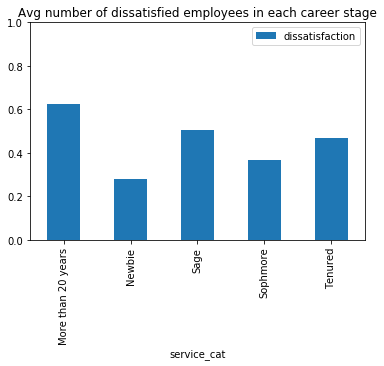

In [29]:
pivot = combined.pivot_table(index='service_cat', values='dissatisfaction', aggfunc=np.mean)
print(pivot, '\n')

pivot.plot(kind='bar', title='Avg number of dissatisfied employees in each career stage', ylim=(0, 1))

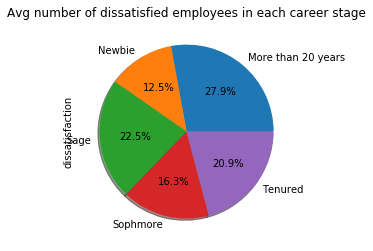

In [39]:
pivot.plot(kind='pie', y='dissatisfaction', title='Avg number of dissatisfied employees in each career stage', legend=False, shadow=True, autopct='%1.1f%%')

## Reporting our initial findings

From visualizing our results, we've arrived at an interesting result where it seems that employees who've been with DETE and TAFE longer generally make up the largest portion of dissatisfied employees! These results seem to counteract pre-conceived notions and findings from Padilla that generally the longer an employee stays with a company, the happier they seem to be. This is shocking, especially those in the `Sage` category who represent the second most portion of dissatisfied employees, because according to Padella's findings, Sage employees should generally be the happiest and hold the senior-most positions. Not only that, these senior employees set the example for the company's culture, have the most stake in the company, and generally make the biggest decisions in terms of the company's future direction.  Perhaps these pre-conceived notions represent the exceptions rather than the norm since not every "Sage" employee can rise to the senior-leadership levels of the organization

With this information, we can inform the strategy and resource allocation of these institute's HR departments by helping them better direct their effort in increasing employee engagement. Of course, our analysis only represents the most basic findings we can conclude from these datasets. In order to garner more insight, we can further take the following initatives:

* Clean the `age` column. How many people in each age group resgined due to some kind of dissatisfaction?
* Instead of analyzing the survey results together, analyze each survey separately. Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?

For now, thank you for taking the time to go through this project. Hopefully, I was able to successfully demonstrate my level of data science skills in data cleaning, analysis, and visualization.